In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blank with 0 as tenure is 0 and no total change are recorded and converted the datatype from object to float 

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Convert 0 and 1 of senior citizen to yes/no to make it is to understand 

In [9]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2081,5934-TSSAU,Female,no,Yes,Yes,23,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1702.90,No
1707,4854-CIDCF,Female,yes,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,73.85,196.40,No
5553,6629-CZTTH,Male,no,No,No,1,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,55.70,55.70,Yes
1572,7675-OZCZG,Female,yes,No,No,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.00,127.10,Yes
6800,1113-IUJYX,Female,no,Yes,No,14,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,No,Mailed check,105.95,1348.90,Yes
1859,4143-HHPMK,Male,no,No,No,52,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.35,4338.60,Yes
3511,3785-KTYSH,Male,no,No,No,53,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.60,1279.00,No
842,1038-ZAGBI,Female,no,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,229.60,Yes
1430,6510-UPNKS,Female,no,No,No,23,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.80,615.35,No
2511,7016-NVRIC,Male,yes,Yes,No,29,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,No,Bank transfer (automatic),90.10,2656.70,No


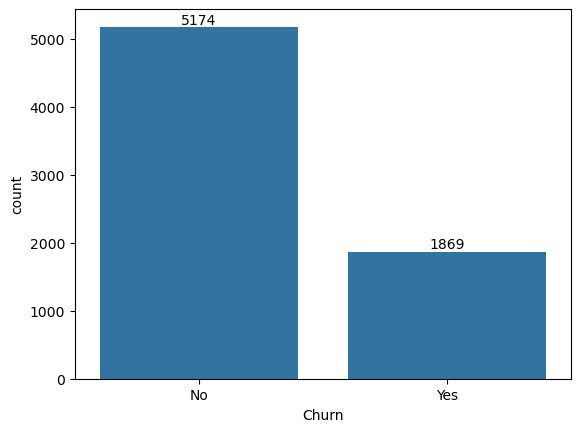

In [11]:
ax = sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


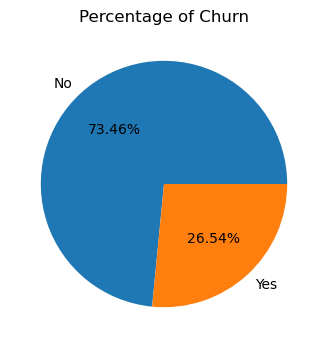

In [13]:
plt.figure(figsize=(4,4))
plt.title("Percentage of Churn")
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels=gb.index, autopct="%1.2f%%")
plt.show()

### From above pie chart we can obseved that 26.54 % of our Coustomers have Churned out

### Now let's figureout the reason behinde it

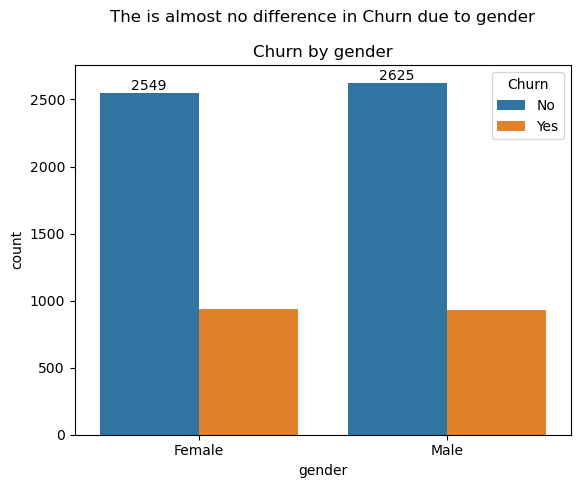

In [14]:
ge = sns.countplot(x='gender',data=df,hue="Churn")
plt.title( "The is almost no difference in Churn due to gender\n\n""Churn by gender" )
plt.bar_label(ge.containers[0])
plt.show()

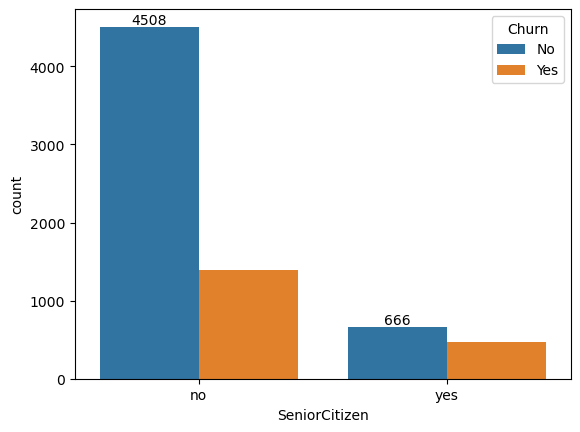

Text(0.5, 1.0, 'Churn by Senior Citizen')

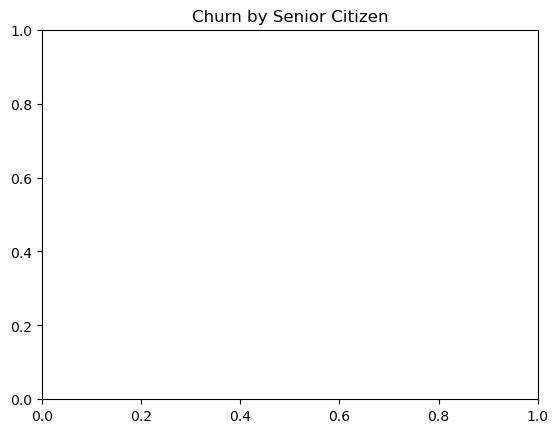

In [15]:
ge = sns.countplot(x='SeniorCitizen',data=df,hue="Churn")
plt.bar_label(ge.containers[0])
plt.show()
#I want to create a stack bar chart which gives me labels as % to totals. #Use this prompt in chatgpt 
plt.title( "Churn by Senior Citizen" )

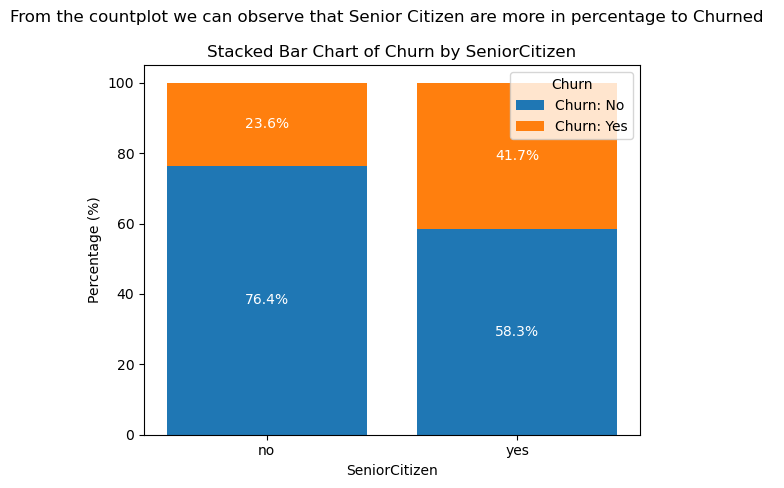

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate counts for each combination of SeniorCitizen and Churn
data_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
data_percent = data_counts.div(data_counts.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots()

# Stacked bar plot
bottom = [0] * len(data_percent.index)
for i, churn_status in enumerate(data_percent.columns):
    ax.bar(data_percent.index, data_percent[churn_status], label=f'Churn: {churn_status}', bottom=bottom)
    # Update the bottom position for stacking
    bottom += data_percent[churn_status]

# Add percentage labels
for idx, row in data_percent.iterrows():
    cumulative_percentage = 0
    for churn_status, percentage in row.items():
        # Label each section with its percentage
        ax.text(idx, cumulative_percentage + percentage / 2, f'{percentage:.1f}%', ha='center', va='center', color="white")
        cumulative_percentage += percentage

# Labels and legend
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage (%)')
ax.set_title("From the countplot we can observe that Senior Citizen are more in percentage to Churned  \n\n"'Stacked Bar Chart of Churn by SeniorCitizen')
ax.legend(title='Churn')
plt.show()


### Comparative a greater percentage of people in senior citizen category have churned 

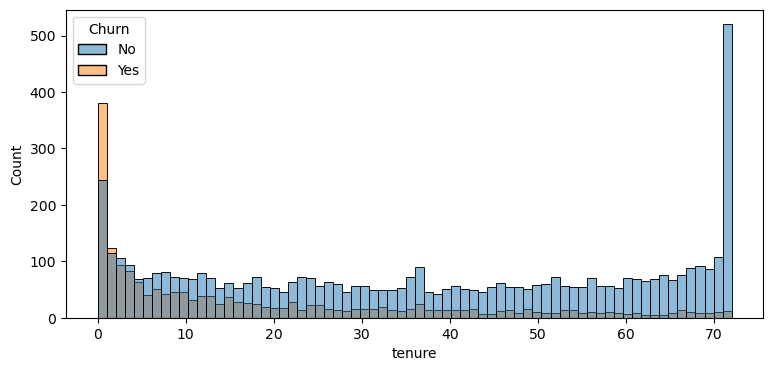

In [17]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,hue="Churn",bins=70)
plt.show()

### People who have used our services for long time have stayed and people who have used our services for 1 or 2 months have churned 

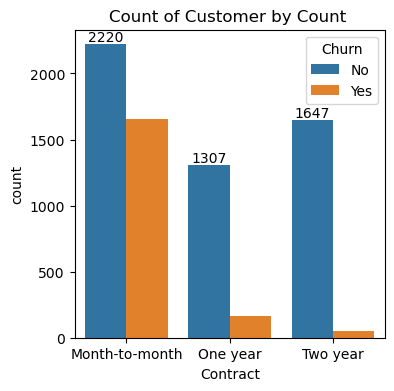

In [18]:
plt.figure(figsize=(4,4))
co = sns.countplot(x="Contract", data=df,hue='Churn')
co.bar_label(co.containers[0])
plt.title("Count of Customer by Count ")
plt.show()

### People who have month to month contract are likely to Churned then from those who have 1 or 2 year or contract.

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

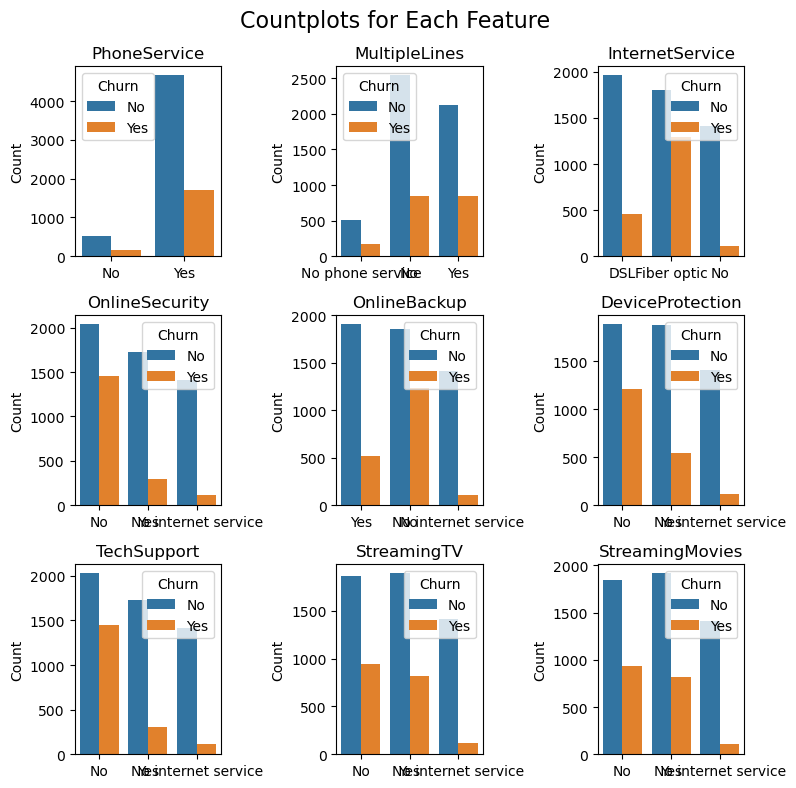

In [20]:
# Define columns for plotting
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Setting up the subplot grid (3x3)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('Countplots for Each Feature', fontsize=16)
plt.subplots_adjust(top=0.95)

# Loop through each column and plot on respective axes
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax,hue=df['Churn'])
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()

## Summary of above data 
### This data visualization shows the distribution of customer churn across various service features. For each service, there’s a noticeable trend where customers without optional services (like Online Security, Backup, Device Protection, etc.) tend to have higher churn rates. Notably, customers with "Fiber optic" Internet ###Service and no security add-ons show a higher propensity to churn, suggesting that service type and additional features might impact customer retention.

In [21]:
#'PhoneService', 'MultipleLines', 'InternetService',
      # 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       #'StreamingTV', 'StreamingMovies'
#these are the columns,and i want to create a subplot from  this data where each plot would be a countplot 

# using this prompt in chatgpt we write above code

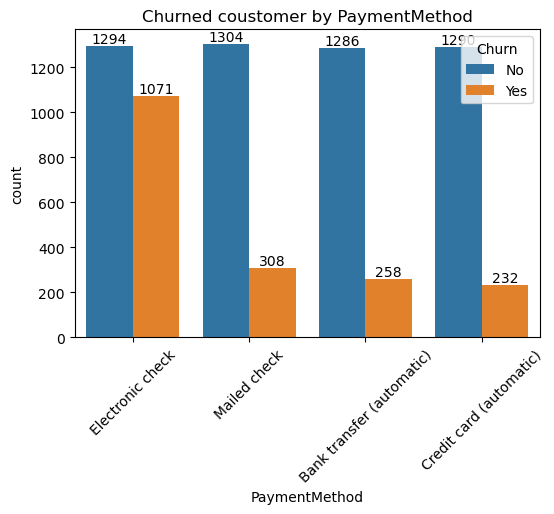

In [32]:
plt.figure(figsize=(6,4))
co = sns.countplot(x="PaymentMethod", data=df,hue='Churn')
co.bar_label(co.containers[0])
co.bar_label(co.containers[1])
plt.title("Churned coustomer by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

### Customer is likely to hurn when he is using electronic check as a payment method.